[278.0264296  177.97446177 106.68544124   6.67885456   7.82685853
   2.5059048    1.34960856]


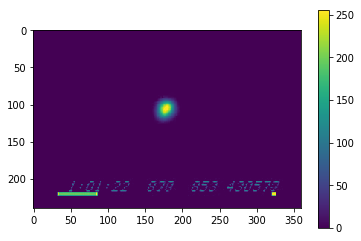

In [7]:
import scipy.optimize as opt
import numpy as np
import pylab as plt
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy.stats
from PIL import Image

filename = 'stills/snap_00020.png'
img = Image.open(filename).convert('L')
data = np.asarray(img)

# Create x and y indices
x=range(len(data[0]))
y=range(len(data))
x,y = np.meshgrid(x,y)

#define model function and pass independant variables x and y as a list
def twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    (x,y)=xdata_tuple
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))
    return g.ravel()

#create data
#data = twoD_Gaussian((x, y), 250,175,100,10,10)

# plot twoD_Gaussian data generated above
plt.figure()
plt.imshow(data)
plt.colorbar()

# add some noise to the data and try to fit the data generated beforehand
initial_guess = (250,175,100,20,20,0,1) #amp, x, y, sigx,sigy, theta, offset

popt, pcov = opt.curve_fit(twoD_Gaussian, (x,y), data.reshape(240*360), p0 = initial_guess)
print(popt)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  after removing the cwd from sys.path.


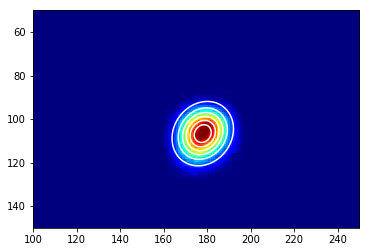

In [8]:
data_fitted = twoD_Gaussian((x, y), *popt)

fig, ax = plt.subplots(1, 1)
ax.hold(True)
ax.imshow(data.reshape(240,360), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(x, y, data_fitted.reshape(240,360), 8, colors='w')
plt.xlim(100,250)
plt.ylim(150,50)
plt.show()